# Convolutional Neural Network for Hand-written Digits Classifiaction



In [1]:
# Import MNIST data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2024-12-05 11:11:55.617940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733393515.631657   51297 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733393515.635926   51297 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 11:11:55.651620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

The MNIST handwritten digits dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. 

More info: http://yann.lecun.com/exdb/mnist/

In [17]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


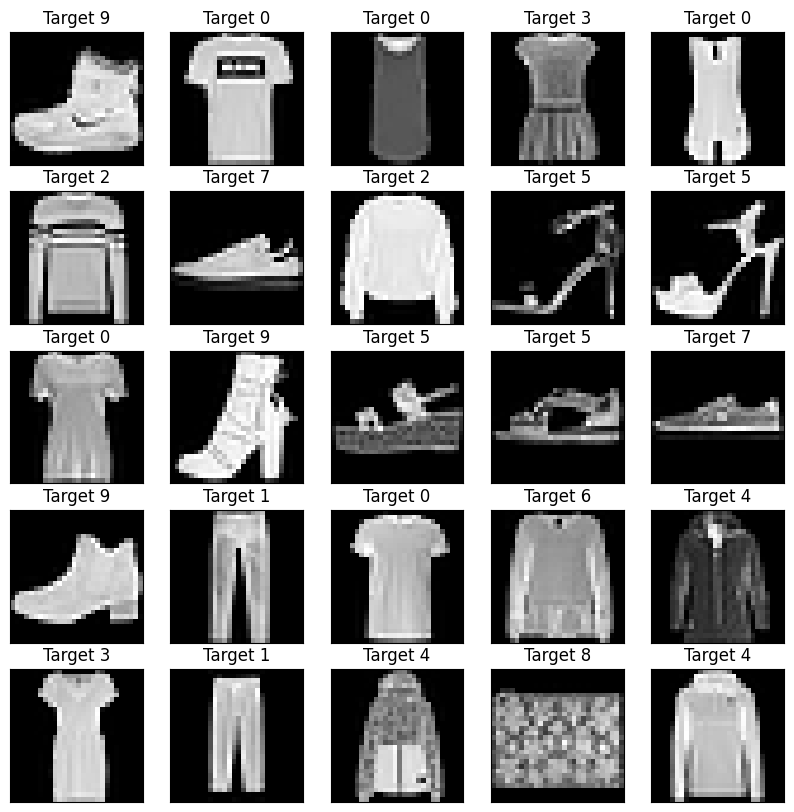

In [18]:
plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    fig = plt.imshow(tf.squeeze(x_train[idx]), cmap='gray')
    plt.title('Target {}'.format(y_train[idx]))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [19]:
model = tf.keras.models.Sequential([tf.keras.layers.Input([28, 28, 1]),
                                    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                                    
                                    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

                                    tf.keras.layers.Conv2D(10, kernel_size=1, activation='relu'),
tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.GlobalAveragePooling2D(),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    # tf.keras.layers.Flatten(),
                                    # tf.keras.layers.Dense(256, activation='relu'),
                                    # tf.keras.layers.Dropout(0.25),
                                    # tf.keras.layers.Dense(10, activation='softmax')
                                   ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
# model = tf.keras.models.Sequential([tf.keras.layers.Input([28, 28, 1]),
#                                     tf.keras.layers.Conv2D(24, kernel_size=5, activation='relu'),
#                                     tf.keras.layers.Dropout(0.25),
#                                     tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#                                     tf.keras.layers.Conv2D(48, kernel_size=5, activation='relu'),
#                                     tf.keras.layers.Dropout(0.25),
#                                     tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#                                     tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(256, activation='relu'),
#                                     tf.keras.layers.Dropout(0.25),
#                                     tf.keras.layers.Dense(10, activation='softmax')
#                                    ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=20,               batch_size=512,
              shuffle=True,)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6440 - loss: 1.3424
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8495 - loss: 0.6181
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8837 - loss: 0.4263
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9020 - loss: 0.3395
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9136 - loss: 0.2847
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9249 - loss: 0.2463
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9324 - loss: 0.2191
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9413 - loss: 0.1893
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9511 - loss: 0.1653
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9569 - loss: 0.1456
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9600 - loss: 0.1320
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

[0.27826014161109924, 0.916700005531311]

In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 10)       │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,440 (1.50 MB)

 Trainable params: 391,480 (1.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.layers[0]._name = 'conv2d_2'
model.layers[1]._name = 'maxpool_2'
model.layers[2]._name = 'dropout_2'
model.layers[3]._name = 'conv2d_3'
model.layers[4]._name = 'maxpool_3'
model.layers[5]._name = 'dropout_3'
model.layers[6]._name = 'flatten'
model.layers[7]._name = 'dense_0'
model.layers[8]._name = 'dense_1'

def visualize_conv_layer(layer_name, input_x, rows, layers, layer):
    layer_output=model.get_layer(layer_name).output
    intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
    intermediate_prediction=intermediate_model.predict(input_x.reshape(1,28,28,1))
    for idx in range(intermediate_prediction.shape[3]):
        plt.subplot(rows, cols, layer+idx*layers)
        fig = plt.imshow(intermediate_prediction[0, :, :, idx], cmap='gray')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        if idx == 0:
            plt.title(layer_name)

In [ ]:
rows = 64
cols = 3
input_x = x_test[1]
plt.figure(figsize=(10,100))
plt.subplot(rows, cols, 1)
fig = plt.imshow(input_x[:, :, 0], cmap='gray')
plt.title('Input')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
visualize_conv_layer('conv2d_0', input_x, 64, 3, 2)
visualize_conv_layer('conv2d_1', input_x, 64, 3, 3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[  12   17   23   25   27   42   43   49   67   68   98  147  150  153
  213  241  244  246  271  285  312  316  324  325  331  332  378  381
  382  387  394  410  437  441  444  454  457  460  498  511  529  548
  565  569  572  600  628  659  670  674  688  711  716  732  751  753
  760  787  800  837  846  851  881  893  902  905  909  921  938  956
  960  966  967  976  977  979  994  997 1000 1025 1043 1046 1051 1077
 1107 1111 1129 1131 1152 1160 1165 1194 1197 1210 1217 1218 1231 1235
 1254 1262 1294 1297 1305 1309 1315 1329 1336 1352 1356 1396 1399 1408
 1425 1449 1455 1469 1483 1487 1496 1501 1509 1527 1533 1559 1572 1592
 1602 1620 1626 1642 1643 1645 1650 1665 1674 1684 1686 1712 1731 1739
 1740 1743 1745 1771 1777 1836 1852 1878 1921 1922 1937 1943 1945 1949
 1953 1955 1968 1974 2001 2009 2022 2037 2062 2064 2067 2069 2071 2073
 2089 2106 2144 2145 2162 2189 2191 2195 2236 2252 2272 2278 2298 2308
 2311 2315 2318 2337 2351 2352 2373 

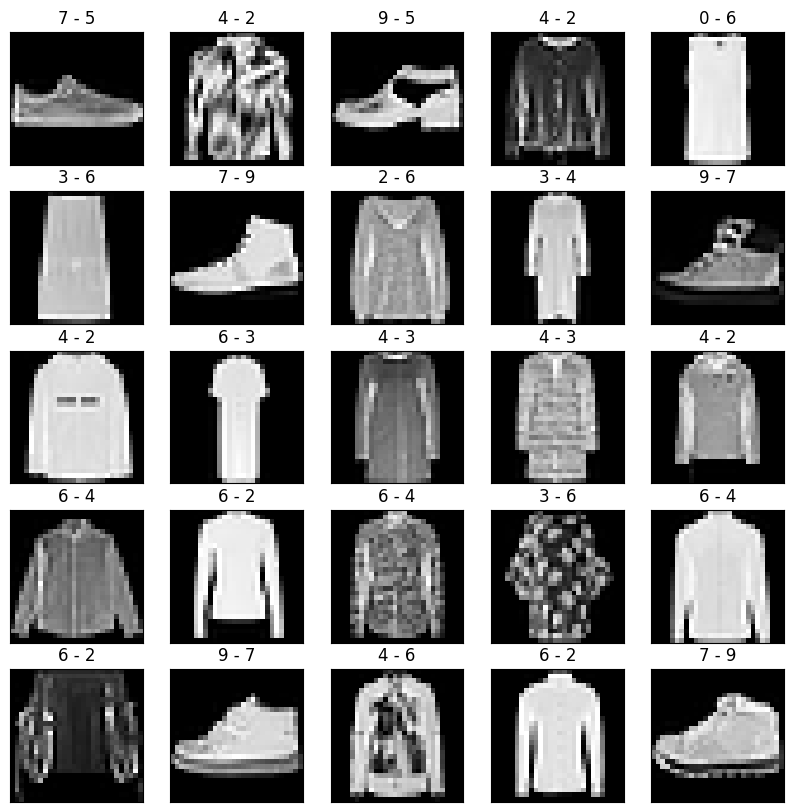

In [21]:
ypredict = np.argmax(model.predict(x_test), axis=1)
wrong = np.where(ypredict-y_test)[0]
plt.figure(figsize=(10, 10))

print(wrong)
start = 100
for idx in range(25):
    plt.subplot(5,5,idx+1)
    fig = plt.imshow(x_test[wrong[idx]].reshape(28,28), cmap='gray')
#     print(model.predict(x_test[idx+start].reshape(1, 28, 28)), np.argmax(model.predict(x_test[idx+start].reshape(1, 28, 28))))
    plt.title('{} - {}'.format(y_test[wrong[idx]], ypredict[wrong[idx]]))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)